In [1]:
import pandas as pd 
df1=pd.read_csv("billwerder_schadstoffe_2012-2023.csv")
df2=pd.read_csv("billwerder_wetter_2012-2023.csv")
df=pd.merge(df1, df2, on="Messzeit")
rolling_mean = df['Schwefeldioxid (µg/m3)'].rolling(window=7, min_periods=1).mean()
df['Schwefeldioxid Mittelwert'] = rolling_mean
df.loc[df['Messzeit'] == "01.01.2019"]

,Unnamed: 0_x,Messzeit,Feinstaub (µg/m3),Schwefeldioxid (µg/m3),Stickstoffdioxid (µg/m3),Stickstoffmonoxid (µg/m3),Unnamed: 0_y,Temperatur (°C),rel. Luftfeuchte (%),Windgeschwindigkeit (m/s),Windrichtung (°),Luftdruck (hPa),Schwefeldioxid Mittelwert
2555,2556,01.01.2019,20.0,3.0,11.0,2.0,2556,6.7,77.3,5.1,292.0,1018.3,4.857143


In [2]:
df.loc[df['Messzeit'] == "01.01.2020"]

,Unnamed: 0_x,Messzeit,Feinstaub (µg/m3),Schwefeldioxid (µg/m3),Stickstoffdioxid (µg/m3),Stickstoffmonoxid (µg/m3),Unnamed: 0_y,Temperatur (°C),rel. Luftfeuchte (%),Windgeschwindigkeit (m/s),Windrichtung (°),Luftdruck (hPa),Schwefeldioxid Mittelwert
2920,2921,01.01.2020,57.0,3.0,34.0,7.0,2921,0.6,95.7,1.1,200.0,1031.4,5.571429


In [3]:
df_train = df.iloc[:2555,:]
df_val = df.iloc[2555:2920,:]
df_test = df.iloc[2920:,:]

In [4]:
df_val

,Unnamed: 0_x,Messzeit,Feinstaub (µg/m3),Schwefeldioxid (µg/m3),Stickstoffdioxid (µg/m3),Stickstoffmonoxid (µg/m3),Unnamed: 0_y,Temperatur (°C),rel. Luftfeuchte (%),Windgeschwindigkeit (m/s),Windrichtung (°),Luftdruck (hPa),Schwefeldioxid Mittelwert
2555,2556,01.01.2019,20.0,3.0,11.0,2.0,2556,6.7,77.3,5.1,292.0,1018.3,4.857143
2556,2557,02.01.2019,11.0,3.0,18.0,2.0,2557,3.4,55.8,4.6,324.0,1028.5,4.428571
2557,2558,03.01.2019,17.0,4.0,56.0,42.0,2558,0.7,78.9,1.7,304.0,1034.7,3.857143
2558,2559,04.01.2019,10.0,3.0,34.0,5.0,2559,4.3,94.9,3.1,294.0,1028.3,3.857143
2559,2560,05.01.2019,13.0,3.0,19.0,2.0,2560,7.3,95.5,3.2,313.0,1022.1,3.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2916,27.12.2019,7.0,3.0,27.0,8.0,2916,2.3,87.3,1.8,41.0,1030.3,3.857143
2916,2917,28.12.2019,11.0,3.0,32.0,23.0,2917,-0.8,91.1,1.1,148.0,1040.8,3.857143
2917,2918,29.12.2019,10.0,3.0,22.0,2.0,2918,-0.1,80.0,1.8,181.0,1035.6,3.857143
2918,2919,30.12.2019,12.0,20.0,29.0,2.0,2919,7.4,29.7,2.5,236.0,1025.0,5.714286


In [5]:
df_train = df_train.dropna()
df_val = df_val.dropna()
df_test = df_test.dropna()

In [6]:
x_train = df_train.drop(columns=['Feinstaub (µg/m3)', 'Messzeit', 'Unnamed: 0_x', 'Stickstoffdioxid (µg/m3)', 'Stickstoffmonoxid (µg/m3)', 'Schwefeldioxid (µg/m3)', 'Unnamed: 0_y'])
y_train = df_train['Schwefeldioxid (µg/m3)']
x_val = df_train.drop(columns=['Feinstaub (µg/m3)', 'Messzeit', 'Unnamed: 0_x', 'Stickstoffdioxid (µg/m3)', 'Stickstoffmonoxid (µg/m3)', 'Schwefeldioxid (µg/m3)', 'Unnamed: 0_y'])
y_val = df_train['Schwefeldioxid (µg/m3)']
x_test = df_test.drop(columns=['Feinstaub (µg/m3)', 'Messzeit', 'Unnamed: 0_x', 'Stickstoffdioxid (µg/m3)', 'Stickstoffmonoxid (µg/m3)', 'Schwefeldioxid (µg/m3)', 'Unnamed: 0_y'])
y_test = df_test['Schwefeldioxid (µg/m3)']

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_history(metrics):
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics])
    plt.xlabel("epochs")
    plt.ylabel("RMSE")

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopper = EarlyStopping(
    monitor='val_loss',
    patience=10
    )

In [34]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

def create_nn():
    inputs = keras.layers.Input(shape=(x_train.shape[1],), name='input')

    layers_dense = keras.layers.BatchNormalization()(inputs)
    layers_dense = keras.layers.Dense(100, 'relu')(layers_dense)
    layers_dense = keras.layers.Dense(50, 'relu')(layers_dense)

    outputs = keras.layers.Dense(1)(layers_dense)

    return keras.Model(inputs=inputs, outputs=outputs, name="model_batchnorm")
model=create_nn()

In [36]:
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=[keras.metrics.RootMeanSquaredError()])
compile_model(model)

In [37]:
compile_model(model)
model.summary()

Model: "model_batchnorm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 6)]               0         
                                                                 
 batch_normalization_82 (Bat  (None, 6)                24        
 chNormalization)                                                
                                                                 
 dense_244 (Dense)           (None, 100)               700       
                                                                 
 dense_245 (Dense)           (None, 50)                5050      
                                                                 
 dense_246 (Dense)           (None, 1)                 51        
                                                                 
Total params: 5,825
Trainable params: 5,813
Non-trainable params: 12
________________________________________________

In [38]:
history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 1000,
                    validation_data=(x_val, y_val),
                    callbacks=[earlystopper],
                    verbose = 2)

Epoch 1/1000
75/75 - 1s - loss: 9.9555 - root_mean_squared_error: 3.1552 - val_loss: 9933.0957 - val_root_mean_squared_error: 99.6649 - 894ms/epoch - 12ms/step
Epoch 2/1000
75/75 - 0s - loss: 5.8230 - root_mean_squared_error: 2.4131 - val_loss: 1042.5854 - val_root_mean_squared_error: 32.2891 - 92ms/epoch - 1ms/step
Epoch 3/1000
75/75 - 0s - loss: 5.2746 - root_mean_squared_error: 2.2967 - val_loss: 166.9625 - val_root_mean_squared_error: 12.9214 - 88ms/epoch - 1ms/step
Epoch 4/1000
75/75 - 0s - loss: 5.1487 - root_mean_squared_error: 2.2691 - val_loss: 25.6735 - val_root_mean_squared_error: 5.0669 - 87ms/epoch - 1ms/step
Epoch 5/1000
75/75 - 0s - loss: 5.1591 - root_mean_squared_error: 2.2714 - val_loss: 6.7398 - val_root_mean_squared_error: 2.5961 - 88ms/epoch - 1ms/step
Epoch 6/1000
75/75 - 0s - loss: 4.8230 - root_mean_squared_error: 2.1961 - val_loss: 4.6842 - val_root_mean_squared_error: 2.1643 - 89ms/epoch - 1ms/step
Epoch 7/1000
75/75 - 0s - loss: 4.6635 - root_mean_squared_err

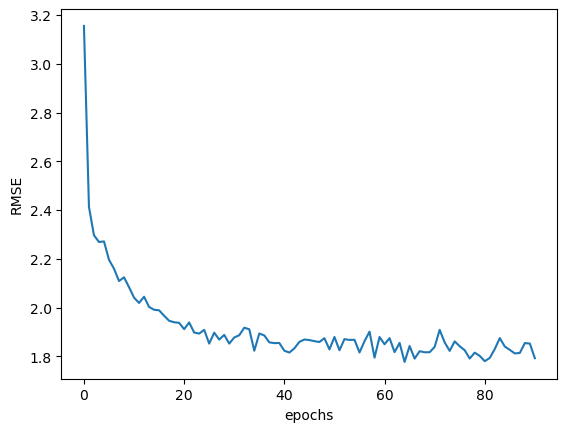

In [39]:
plot_history('root_mean_squared_error')

In [40]:
y_train_predicted = model.predict(x_train)
y_test_predicted = model.predict(x_test)

36/36 [==============================] - 0s 469us/step


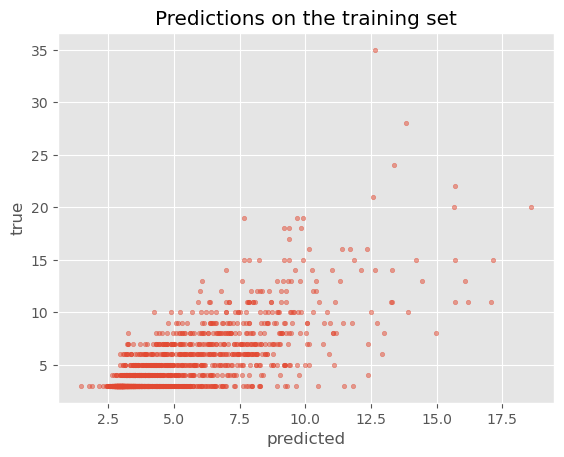

In [41]:
def plot_predictions(y_pred, y_true, title):
    plt.style.use('ggplot') 
    plt.scatter(y_pred, y_true, s=10, alpha=0.5)
    plt.xlabel("predicted")
    plt.ylabel("true")
    plt.title(title)
   

plot_predictions(y_train_predicted, y_train, title='Predictions on the training set')

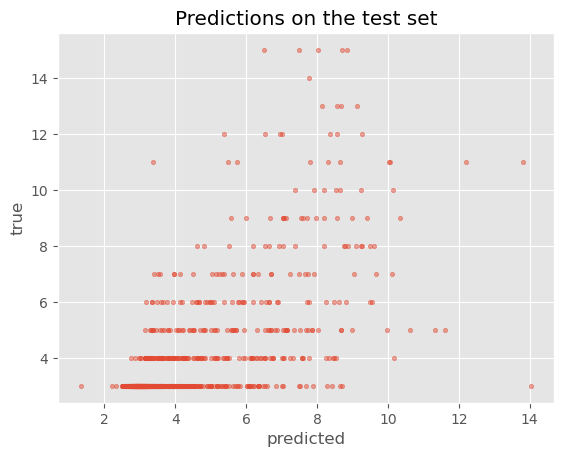

In [42]:
plot_predictions(y_test_predicted, y_test, title='Predictions on the test set')

In [43]:
train_metrics = model.evaluate(x_train, y_train, return_dict=True)
test_metrics = model.evaluate(x_test, y_test, return_dict=True)
print('Train RMSE: {:.2f}, Test RMSE: {:.2f}'.format(train_metrics['root_mean_squared_error'], test_metrics['root_mean_squared_error']))


36/36 [==============================] - 0s 515us/step - loss: 2.3231 - root_mean_squared_error: 1.5242
Train RMSE: 1.67, Test RMSE: 1.52


In [ ]:
x_test

In [ ]:
plot_history(['root_mean_squared_error', 'val_root_mean_squared_error'])
